In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import data from csv file
df = pd.read_csv('termopar_dados.csv', sep=',')

In [11]:
#fit a 2nd order polynomial to the data
z = np.polyfit(df['T (C)'], df['I (A)'], 2)
f = np.poly1d(z)

In [27]:
z

array([ 4.82751670e-05, -6.71821255e-03,  3.51962698e-01])

In [26]:
f

poly1d([ 4.82751670e-05, -6.71821255e-03,  3.51962698e-01])

Text(0, 0.5, 'Current (A)')

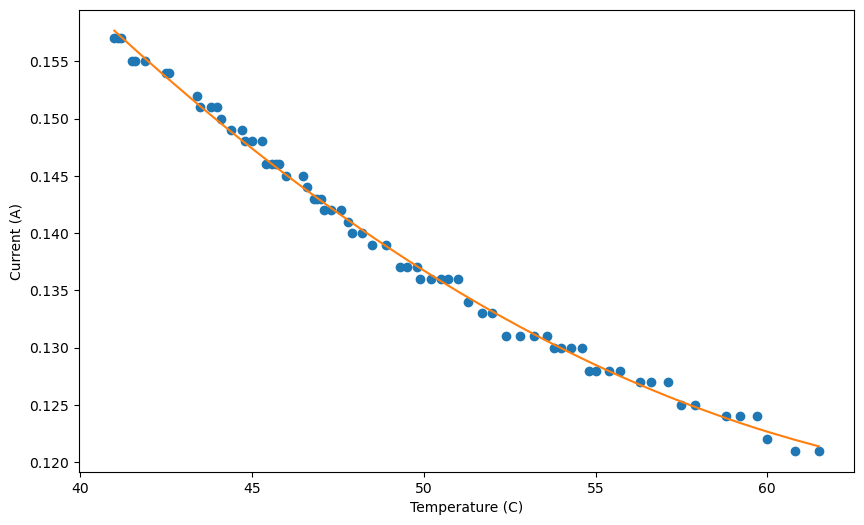

In [13]:
#plot the data
plt.figure(figsize=(10,6))
plt.plot(df['T (C)'], df['I (A)'], 'o', df['T (C)'], f(df['T (C)']), '-')
plt.xlabel('Temperature (C)')
plt.ylabel('Current (A)')

Text(0, 0.5, 'Temperature (C)')

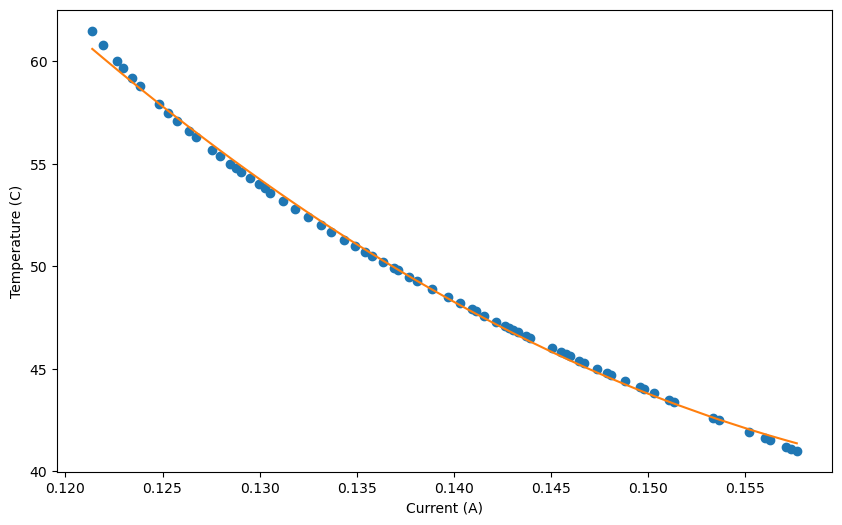

In [22]:
#invert the polynomial 
f_inv = np.poly1d(np.polyfit(f(df['T (C)']), df['T (C)'], 2))
#plot the inverted polynomial
plt.figure(figsize=(10,6))
plt.plot(f(df['T (C)']), df['T (C)'], 'o', f(df['T (C)']), f_inv(f(df['T (C)'])), '-')
plt.xlabel('Current (A)')
plt.ylabel('Temperature (C)')



In [28]:
# calcualte the expected current for the 10 last temperatures in df
I_fitted = f(df['T (C)'].tail(10))

array([0.15106914, 0.15132145, 0.15337469, 0.15363568, 0.15522196,
       0.15602813, 0.15629878, 0.15711654, 0.15739106, 0.15766654])

In [25]:
#with a potential difference of 15V, calculate the resistance in OHM
R = 15/I_fitted
print(R)

[99.29228644 99.12672867 97.79971163 97.63356739 96.6358123  96.13651148
 95.9700368  95.47053396 95.3040172  95.1374977 ]


In [34]:
#create a dataframe with the 10 last temperatures, the current, and the calculated resistance
df2 = pd.DataFrame({'T (C)': df['T (C)'].tail(10), 'I (A) Observada':df['I (A)'].tail(10), 'I (A) Calculada': I_fitted, 'R (OHM) Calculada': R})
df2

,T (C),I (A) Observada,I (A) Calculada,R (OHM) Calculada
60,43.5,0.151,0.151069,99.292286
61,43.4,0.152,0.151321,99.126729
62,42.6,0.154,0.153375,97.799712
63,42.5,0.154,0.153636,97.633567
64,41.9,0.155,0.155222,96.635812
65,41.6,0.155,0.156028,96.136511
66,41.5,0.155,0.156299,95.970037
67,41.2,0.157,0.157117,95.470534
68,41.1,0.157,0.157391,95.304017
69,41.0,0.157,0.157667,95.137498
